## 3.1 Loading ther IMDB dataset

In [21]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [22]:
print('train_data[0] : ', train_data[0])
print('test_data[0] : ', train_labels[0])

train_data[0] :  [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
test_data[0] :  1


## 3.2 Encoding the integer sequences into a binary metrix

In [23]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [24]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [27]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [33]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## 3.3 The model definition

In [43]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [46]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


## 3.4 Compilling the model

In [47]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

## 3.5 Configuring the optimizer

In [48]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

## 3.6 Using custom losses and metrics

In [51]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

## 3.7 Setting aside a validation set

In [53]:
x_val = x_train[:10000]
partial_x_trian = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## 3.8 Training your model

In [55]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(partial_x_trian,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 170us/step - loss: 0.5311 - acc: 0.7583 - val_loss: 0.3968 - val_acc: 0.8689
Epoch 2/20
15000/15000 [==============================] - 2s 118us/step - loss: 0.3138 - acc: 0.9032 - val_loss: 0.3523 - val_acc: 0.8571
Epoch 3/20
15000/15000 [==============================] - 2s 118us/step - loss: 0.2271 - acc: 0.9296 - val_loss: 0.2818 - val_acc: 0.8887
Epoch 4/20
15000/15000 [==============================] - 2s 117us/step - loss: 0.1762 - acc: 0.9443 - val_loss: 0.2762 - val_acc: 0.8895
Epoch 5/20
15000/15000 [==============================] - 2s 117us/step - loss: 0.1413 - acc: 0.9558 - val_loss: 0.2878 - val_acc: 0.8862
Epoch 6/20
15000/15000 [==============================] - 2s 117us/step - loss: 0.1170 - acc: 0.9646 - val_loss: 0.2948 - val_acc: 0.8846
Epoch 7/20
15000/15000 [==============================] - 2s 118us/step - loss: 0.0935 - acc: 0.9733 - val_loss: 0.3507 - 

In [56]:
history_dict = history.history
history_dict .keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

## 3.9 Plotting the training and validation loss

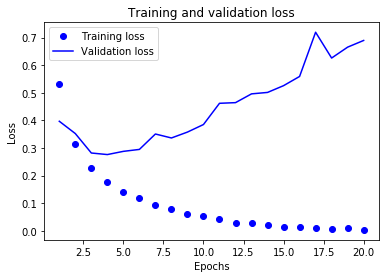

In [61]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

acc = 20
epochs = range(1, acc + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 3.10 Plotting the training and validation accuracy

In [ ]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()